# Prediksi Harga Saham
- Dataset dapat di download melalui https://www.investing.com/indices/idx-composite-historical-data (https://www.investing.com/indices/idx-composite-historical-data)
- dataset ini berisi data historis harga saham indeks IDX Composite dari situs web Investing.com. Dataset ini berisi data harian harga saham IDX Composite. Setiap baris dalam dataset ini mewakili harga saham pada satu hari tertentu, Terdapat tujuh kolom dalam dataset ini, yaitu:
1. Date: Tanggal harga saham diambil.
2. Price: Harga penutupan indeks pada hari tersebut.
3. Open: Harga pembukaan indeks pada hari tersebut.
4. High: Harga tertinggi indeks pada hari tersebut.
5. Low: Harga terendah indeks pada hari tersebut.
6. Vol.: Jumlah saham yang diperdagangkan pada hari tersebut.
7. Change %: Persentase perubahan harga indeks dibandingkan dengan hari sebelumnya.

# 1. Import Modul dan library

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Load Dataset

In [2]:
df = pd.read_csv('./dataset/dataset_latih.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,07/01/2022,"6,794.33","6,911.58","6,940.98","6,777.32",15.74B,-1.70%
1,06/30/2022,"6,911.58","6,942.35","6,990.86","6,897.68",16.48B,-0.44%
2,06/29/2022,"6,942.35","6,996.46","7,016.06","6,942.35",16.47B,-0.77%
3,06/28/2022,"6,996.46","7,016.14","7,016.92","6,960.07",17.26B,-0.28%
4,06/27/2022,"7,016.06","7,043.02","7,070.52","6,973.66",18.14B,-0.38%
...,...,...,...,...,...,...,...
1210,07/07/2017,"5,814.79","5,839.89","5,863.59","5,810.36",3.75B,-0.59%
1211,07/06/2017,"5,849.57","5,817.80","5,852.34","5,817.39",4.15B,0.42%
1212,07/05/2017,"5,825.05","5,865.43","5,874.69","5,808.35",4.73B,-0.69%
1213,07/04/2017,"5,865.36","5,886.72","5,896.37","5,858.61",3.93B,-0.76%


# 3. Exploratory Data Analysis (EDA):

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1215 non-null   object
 1   Price     1215 non-null   object
 2   Open      1215 non-null   object
 3   High      1215 non-null   object
 4   Low       1215 non-null   object
 5   Vol.      1214 non-null   object
 6   Change %  1215 non-null   object
dtypes: object(7)
memory usage: 66.6+ KB


In [4]:
# menampilkan informasi statistik data
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,1215,1215,1215,1215,1215,1214,1215
unique,1215,1210,1212,1207,1207,898,383
top,07/01/2022,"6,078.57","6,144.94","6,096.66","5,811.92",5.14B,0.03%
freq,1,2,2,2,2,5,13


Terdapat kemungkinan missing value pada kolom Vol., perhatikan pada (jumlah data) count = 1214

In [5]:
# melihat frekuensi kemunculan data
df['Date'].value_counts()

07/01/2022    1
02/20/2019    1
02/22/2019    1
02/25/2019    1
02/26/2019    1
             ..
10/27/2020    1
11/02/2020    1
11/03/2020    1
11/04/2020    1
07/03/2017    1
Name: Date, Length: 1215, dtype: int64

### Data dimulai dari tanggal 3 juli 2017 hingga 1 juli 2022

In [6]:
df['Date'].describe()

count           1215
unique          1215
top       07/01/2022
freq               1
Name: Date, dtype: object

In [7]:
df['Price'].describe()

count         1215
unique        1210
top       6,078.57
freq             2
Name: Price, dtype: object

In [8]:
df['Open'].describe()

count         1215
unique        1212
top       6,144.94
freq             2
Name: Open, dtype: object

In [9]:
df['High'].describe()

count         1215
unique        1207
top       6,096.66
freq             2
Name: High, dtype: object

In [10]:
df['Low'].describe()

count         1215
unique        1207
top       5,811.92
freq             2
Name: Low, dtype: object

In [11]:
df['Vol.'].describe()

count      1214
unique      898
top       5.14B
freq          5
Name: Vol., dtype: object

In [12]:
df['Change %'].describe()

count      1215
unique      383
top       0.03%
freq         13
Name: Change %, dtype: object

In [13]:
df['Date'].describe()

count           1215
unique          1215
top       07/01/2022
freq               1
Name: Date, dtype: object

In [14]:
df['Price'].value_counts()

6,078.57    2
6,221.01    2
6,165.62    2
5,952.08    2
6,209.12    2
           ..
5,144.05    1
5,128.23    1
5,115.13    1
5,159.45    1
5,910.24    1
Name: Price, Length: 1210, dtype: int64

In [15]:
# cek missing value
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [16]:
# mengahapus missing value (karena hanya 1 data saja)
df=df.dropna()

In [17]:
#cek data duplikat
df.duplicated().sum()

0

## Casting/Konversi tipe data

In [18]:
# Mengubah tipe data kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengubah tipe data kolom Price menjadi float
columns_harga = ['Price', 'Open', 'High', 'Low']
df[columns_harga] = df[columns_harga].replace(',', '', regex=True).astype(float)
#Ubah tipe data kolom Vol. menjadi tipe data numerik:
df['Vol.'] = df['Vol.'].str.replace(',', '')
df['Vol.'] = df['Vol.'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
#Ubah tipe data kolom Change % menjadi tipe data numerik:
df['Change %'] = df['Change %'].str.replace('%', '')
df['Change %'] = df['Change %'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

In [19]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %           float64
dtype: object

In [20]:
df.describe().round(2)

,Price,Open,High,Low,Vol.,Change %
count,1214.00,1214.00,1214.00,1214.00,1214.00,1214.00
mean,6055.40,6058.51,6089.49,6020.63,11.45,0.73
std,563.94,564.91,559.54,568.65,6.43,0.77
min,3937.63,3937.63,4123.56,3911.72,2.64,0.00
25%,5867.08,5863.54,5895.36,5835.88,6.14,0.24
50%,6106.94,6107.52,6134.14,6066.82,9.69,0.53
75%,6384.44,6390.70,6413.16,6359.73,15.94,0.96
max,7276.19,7283.42,7355.30,7245.73,34.48,10.19


# 4. Visualisasi Data:
- Menampilkan visualisasi grafik untuk masing-masing atribut.
- Bisa menggunakan grafik seperti line plot, scatter plot, atau box plot untuk memahami tren, pola, dan variabilitas data.
- Analisis dan Interpretasi

# Korelasi setiap atribut terhadap harga penutupan

Price       1.000000
Open        0.995504
High        0.997750
Low         0.998076
Vol.        0.502829
Change %   -0.306501
Name: Price, dtype: float64


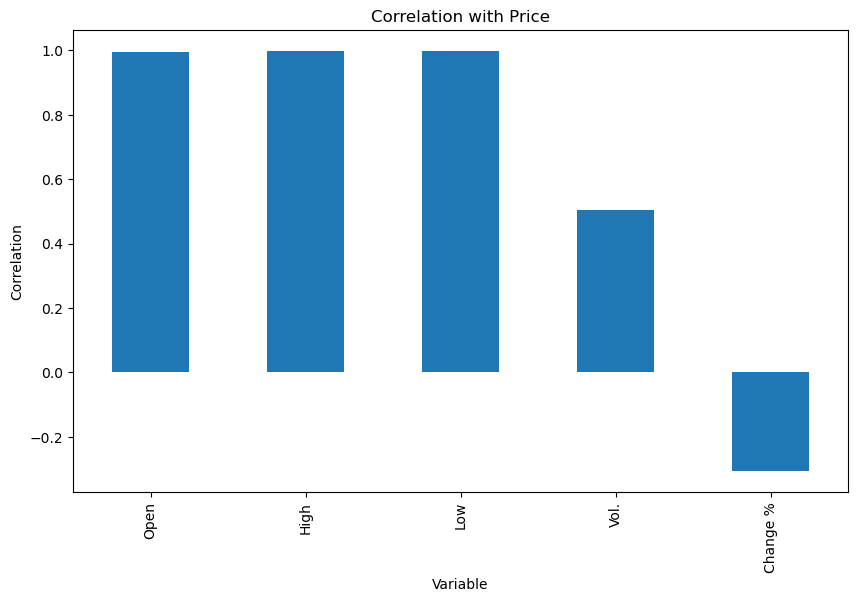

In [21]:
# Menghitung korelasi antara kolom Price dengan kolom lain
correlation = df.corr()['Price']
print(correlation)

# Plot korelasi
plt.figure(figsize=(10, 6))
correlation.drop('Price').plot(kind='bar')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.title('Correlation with Price')
plt.show()

# 4-1. Distribusi Data Time series Harga Penutupan

In [24]:
#membagi waktu menjadi har,minggu,bulan,tahun
df['day'] =df['Date'].dt.day
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year
df

,Date,Price,Open,High,Low,Vol.,Change %,day,week,month,year
0,2022-07-01,6794.33,6911.58,6940.98,6777.32,15.74,1.70,1,26,7,2022
1,2022-06-30,6911.58,6942.35,6990.86,6897.68,16.48,0.44,30,26,6,2022
2,2022-06-29,6942.35,6996.46,7016.06,6942.35,16.47,0.77,29,26,6,2022
3,2022-06-28,6996.46,7016.14,7016.92,6960.07,17.26,0.28,28,26,6,2022
4,2022-06-27,7016.06,7043.02,7070.52,6973.66,18.14,0.38,27,26,6,2022
...,...,...,...,...,...,...,...,...,...,...,...
1210,2017-07-07,5814.79,5839.89,5863.59,5810.36,3.75,0.59,7,27,7,2017
1211,2017-07-06,5849.57,5817.80,5852.34,5817.39,4.15,0.42,6,27,7,2017
1212,2017-07-05,5825.05,5865.43,5874.69,5808.35,4.73,0.69,5,27,7,2017
1213,2017-07-04,5865.36,5886.72,5896.37,5858.61,3.93,0.76,4,27,7,2017


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1214
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1214 non-null   datetime64[ns]
 1   Price     1214 non-null   float64       
 2   Open      1214 non-null   float64       
 3   High      1214 non-null   float64       
 4   Low       1214 non-null   float64       
 5   Vol.      1214 non-null   float64       
 6   Change %  1214 non-null   float64       
 7   day       1214 non-null   int64         
 8   week      1214 non-null   int64         
 9   month     1214 non-null   int64         
 10  year      1214 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 113.8 KB


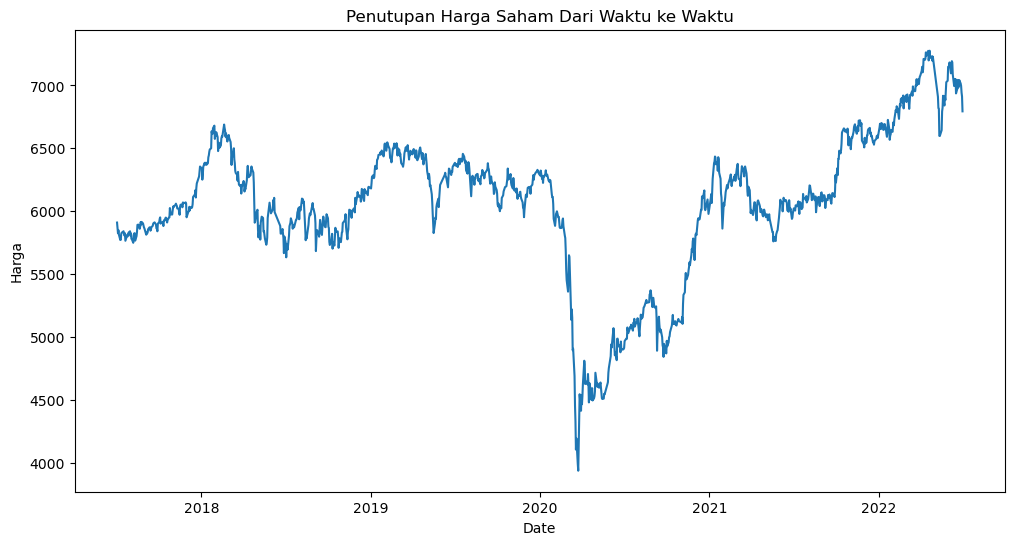

In [26]:
# Plot harga saham seiring waktu
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Harga')
plt.title('Penutupan Harga Saham Dari Waktu ke Waktu')
plt.show()

In [27]:
df.groupby('year')['Price'].agg([len,min,max])

,len,min,max
year,,,
2017,124,5749.29,6355.65
2018,240,5633.94,6689.29
2019,245,5826.87,6547.88
2020,242,3937.63,6325.41
2021,246,5760.58,6723.39
2022,117,6568.17,7276.19


Dapat dilihat bawha harga tertinggi pernah terjadi di tahun 2022 yang mencapai harga 7276, sedangkan harga terendah terjadi pada masa covid-19 dengan harga 3937 .

<Figure size 1600x600 with 0 Axes>

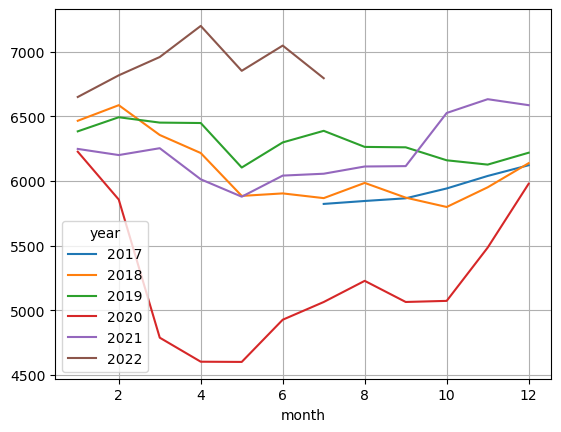

In [28]:
#visualisasi data harga saham
plt.figure(figsize=(16,6))
monthly_sales = pd.pivot_table(df, values = "Price", columns = "year", index = "month")
plt.savefig('./hargasaham.png')
monthly_sales.plot()
plt.grid()

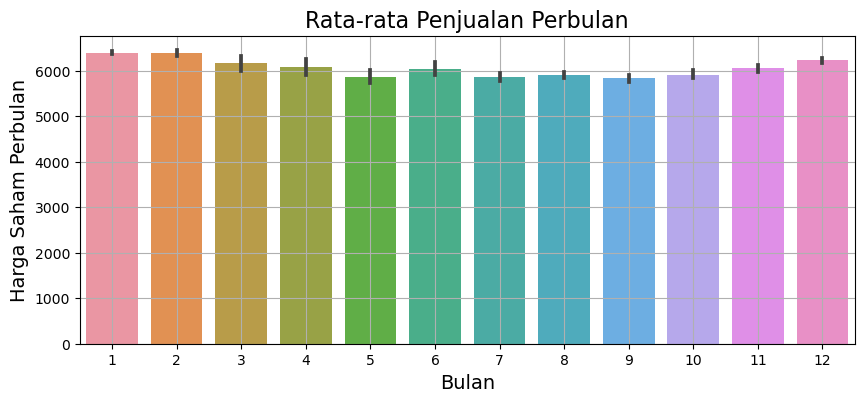

In [29]:
#visualisasi data penjualan, untuk mengetahui bulan dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='month',y='Price',data=df)
plt.ylabel('Harga Saham Perbulan',fontsize=14)
plt.xlabel('Bulan',fontsize=14)
plt.title('Rata-rata Penjualan Perbulan',fontsize=16)
plt.savefig('./penjualan-bulan.png')
plt.grid()

Pada setiap tahunnya, harga selalu turun dipertengahan tahun dan selalu naik diawal dan akhir tahun

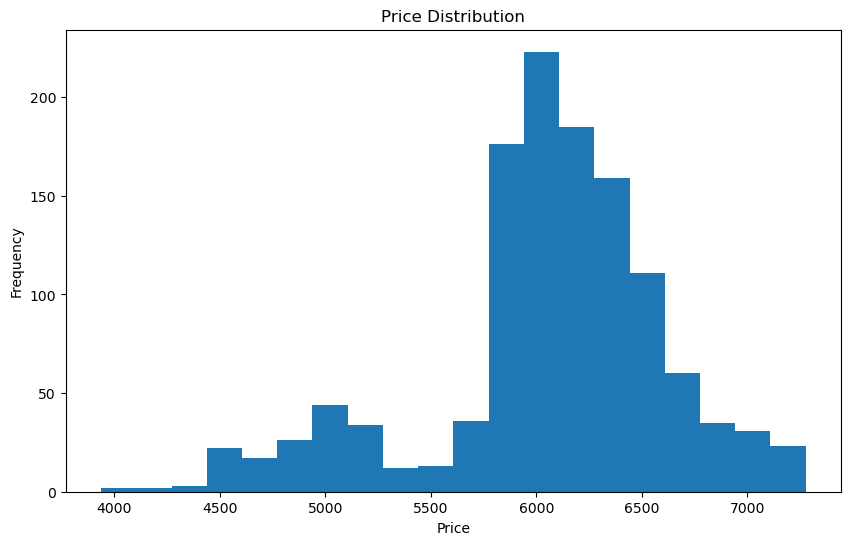

In [32]:
# Histogram harga saham
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

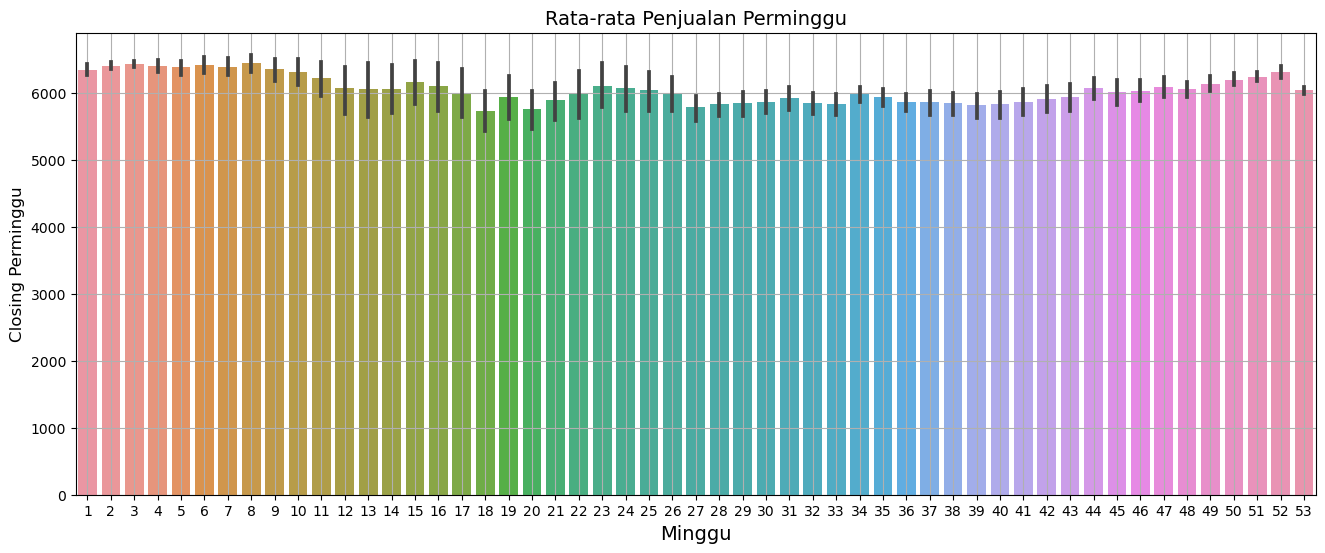

In [35]:
plt.figure(figsize=(16,6))
sns.barplot(x='week',y='Price',data=df)
plt.ylabel('Closing Perminggu',fontsize=12)
plt.xlabel('Minggu',fontsize=14)
plt.title('Rata-rata Penjualan Perminggu',fontsize=14)
plt.savefig('./penjualan-minggu.png')
plt.grid()

In [36]:
df.groupby('week')['Price'].mean().sort_values(ascending=False).head()

week
8    6438.498800
3    6432.001200
6    6408.507826
2    6402.556400
4    6399.511600
Name: Price, dtype: float64

# 4-2. Open (Harga Pembukaan)

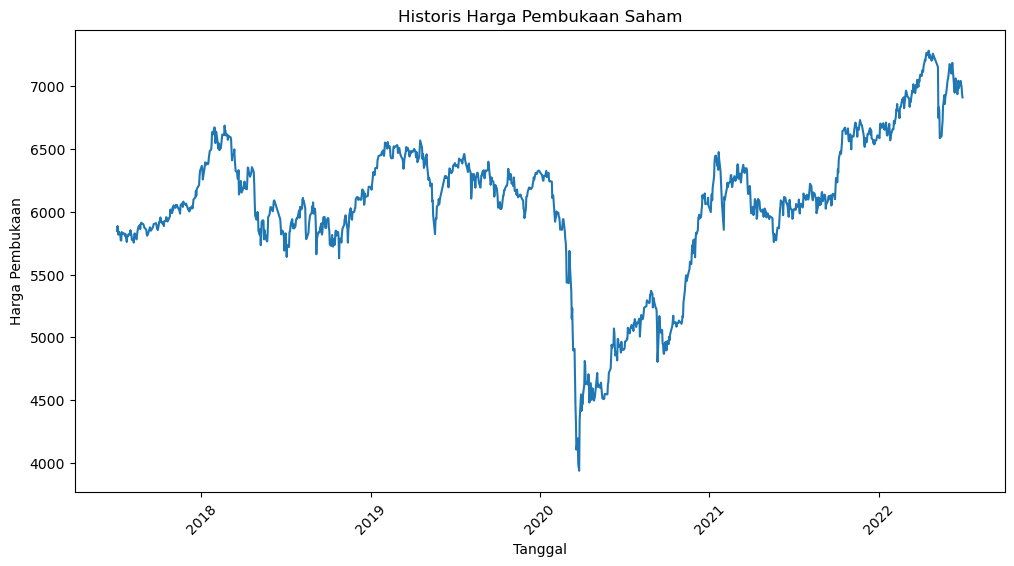

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'])
plt.title('Historis Harga Pembukaan Saham')
plt.xlabel('Tanggal')
plt.ylabel('Harga Pembukaan')
plt.xticks(rotation=45)
plt.show()

In [38]:
df.groupby('year')['Open'].agg([len,min,max])

,len,min,max
year,,,
2017,124,5755.05,6325.62
2018,240,5629.95,6687.23
2019,245,5822.47,6568.85
2020,242,3937.63,6326.17
2021,246,5759.63,6731.52
2022,117,6569.82,7283.42


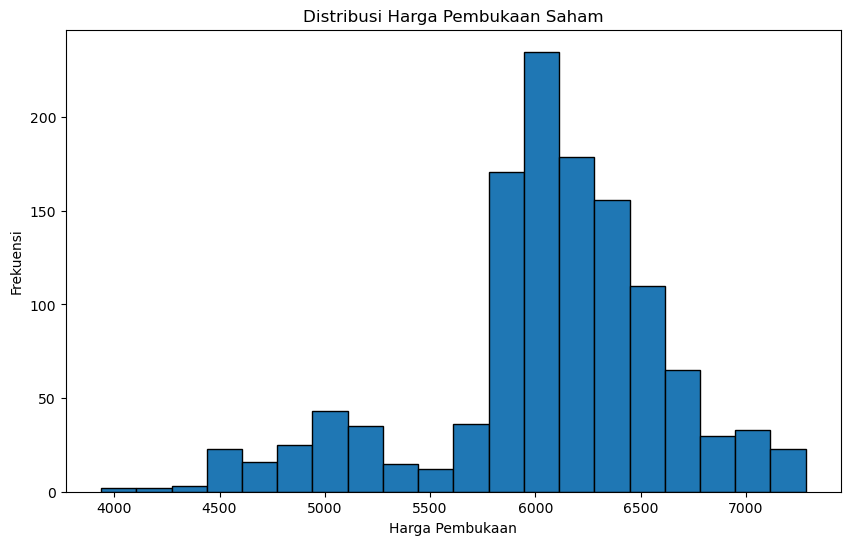

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['Open'], bins=20, edgecolor='k')
plt.title('Distribusi Harga Pembukaan Saham')
plt.xlabel('Harga Pembukaan')
plt.ylabel('Frekuensi')
plt.show()

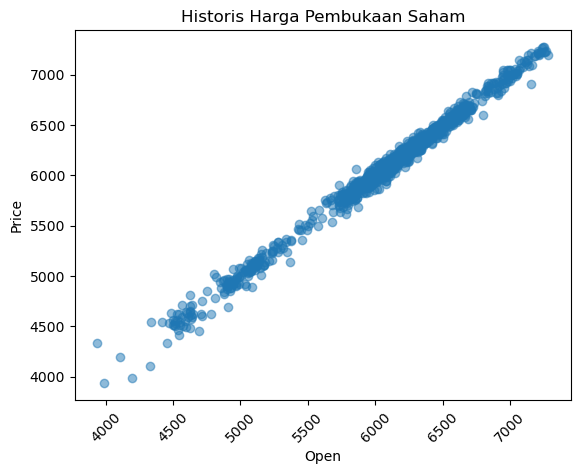

In [40]:
#Open vs Price
plt.scatter(data=df,x='Open', y='Price', alpha=0.5)
plt.title('Historis Harga Pembukaan Saham')
plt.xlabel('Open')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

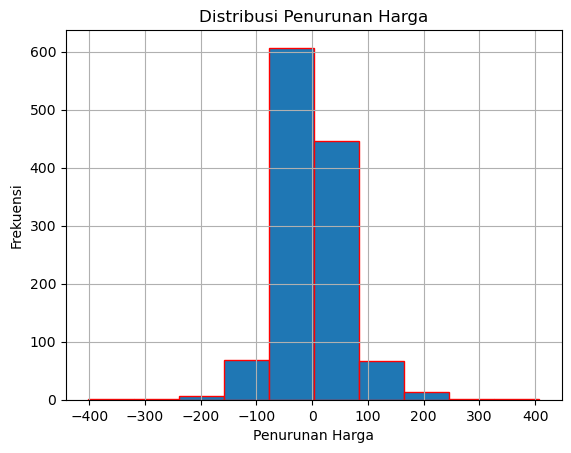

In [41]:
# Menghitung Penurunan Harga
df['Price Change'] = df['Open'].diff()

# Analisis Distribusi dan Visualisasi
plt.hist(df['Price Change'], bins=10, edgecolor='red')
plt.title('Distribusi Penurunan Harga')
plt.xlabel('Penurunan Harga')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

### Penjelasan kode
- fungsi .diff() pada kolom 'Open' untuk menghitung perbedaan harga pembukaan antara hari ini dan hari sebelumnya. Hasilnya akan disimpan dalam kolom baru 'Price Change'.###99-

In [42]:
df['Price Change'].describe()

count    1213.000000
mean       -0.877972
std        59.498927
min      -401.270000
25%       -33.970000
50%        -2.080000
75%        25.510000
max       407.360000
Name: Price Change, dtype: float64

# 4-3. Harga Tertinggi

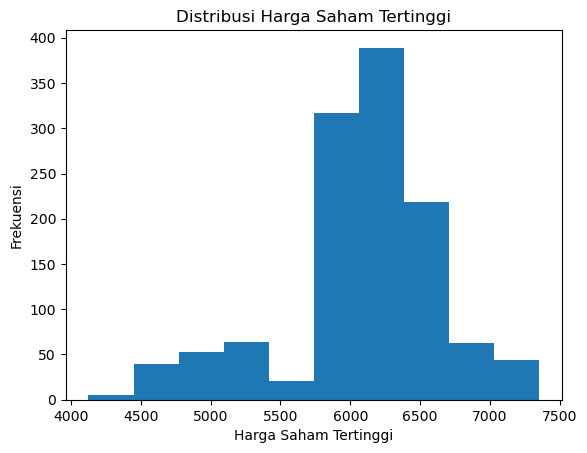

In [43]:
plt.hist(df['High'], bins=10)
plt.title('Distribusi Harga Saham Tertinggi')
plt.xlabel('Harga Saham Tertinggi')
plt.ylabel('Frekuensi')
plt.show()

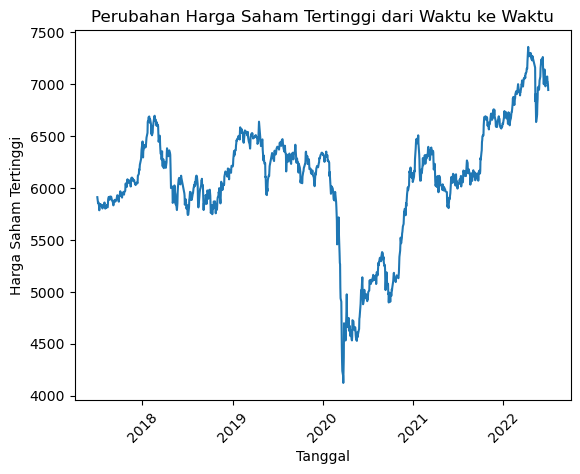

In [44]:
plt.plot(df['Date'], df['High'])
plt.title('Perubahan Harga Saham Tertinggi dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham Tertinggi')
plt.xticks(rotation=45)
plt.show()

In [45]:
df.groupby('year')['High'].agg([len,min,max])

,len,min,max
year,,,
2017,124,5784.08,6368.32
2018,240,5738.93,6693.47
2019,245,5930.15,6636.33
2020,242,4123.56,6348.53
2021,246,5805.15,6754.46
2022,117,6601.34,7355.30


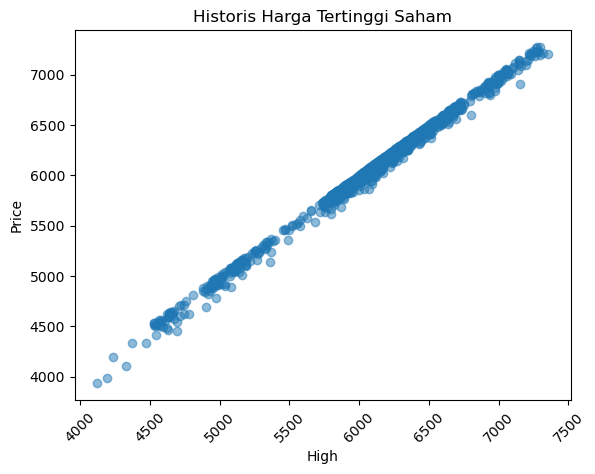

In [46]:
#High vs Price
plt.scatter(data=df,x='High', y='Price', alpha=0.5)
plt.title('Historis Harga Tertinggi Saham')
plt.xlabel('High')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# 4-3. Harga Terendah

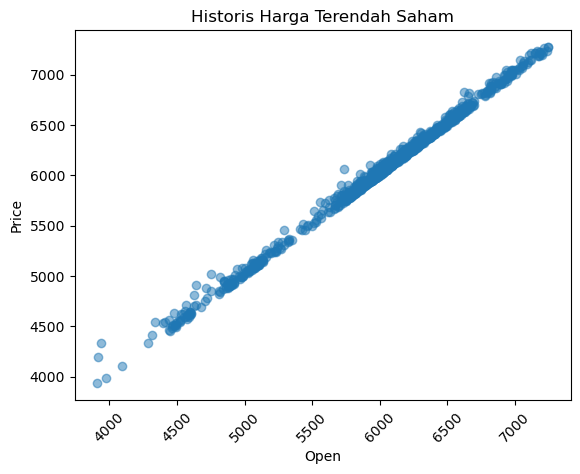

In [47]:
#Low vs Price
plt.scatter(data=df,x='Low', y='Price', alpha=0.5)
plt.title('Historis Harga Terendah Saham')
plt.xlabel('Open')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

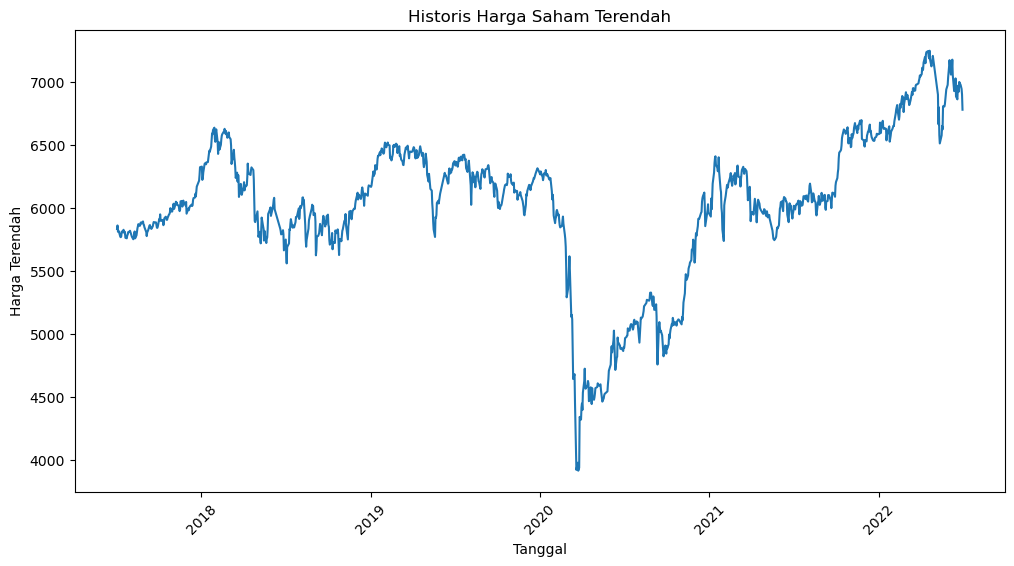

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Low'])
plt.title('Historis Harga Saham Terendah')
plt.xlabel('Tanggal')
plt.ylabel('Harga Terendah')
plt.xticks(rotation=45)
plt.show()

In [49]:
df.groupby('year')['Low'].agg([len,min,max])

,len,min,max
year,,,
2017,124,5749.29,6321.09
2018,240,5557.56,6634.89
2019,245,5767.40,6517.23
2020,242,3911.72,6298.61
2021,246,5735.47,6694.80
2022,117,6509.88,7245.73


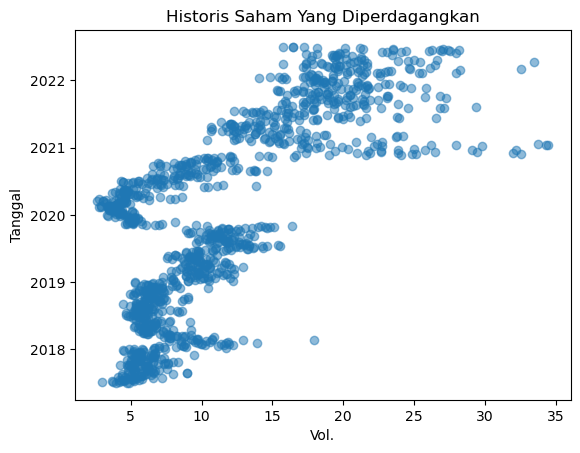

In [50]:
#Vol.
plt.scatter(data=df,x='Vol.', y='Date', alpha=0.5)
plt.title('Historis Saham Yang Diperdagangkan')
plt.xlabel('Vol.')
plt.ylabel('Tanggal')
plt.xticks(rotation=0)
plt.show()

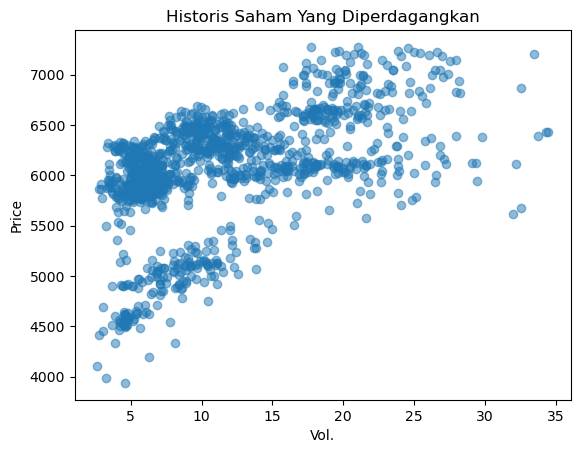

In [51]:
#Vol. vs Price
plt.scatter(data=df,x='Vol.', y='Price', alpha=0.5)
plt.title('Historis Saham Yang Diperdagangkan')
plt.xlabel('Vol.')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

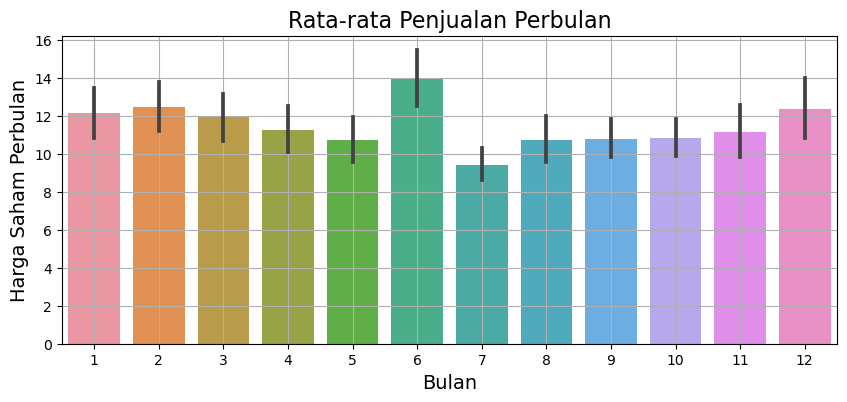

In [52]:
#visualisasi data penjualan, untuk mengetahui bulan dengan tingkat penjualan tertinggi
plt.figure(figsize=(10,4))
sns.barplot(x='month',y='Vol.',data=df)
plt.ylabel('Harga Saham Perbulan',fontsize=14)
plt.xlabel('Bulan',fontsize=14)
plt.title('Rata-rata Penjualan Perbulan',fontsize=16)
plt.savefig('./vol.png')
plt.grid()

In [53]:
df.groupby('month')['Vol.'].agg([len,min,max])

,len,min,max
month,,,
1,107,3.30,34.48
2,95,2.77,28.27
3,106,2.64,32.58
4,101,3.68,33.46
5,89,3.91,27.96
6,91,4.42,28.16
7,110,3.00,19.36
8,103,4.10,29.36
9,103,4.43,27.26


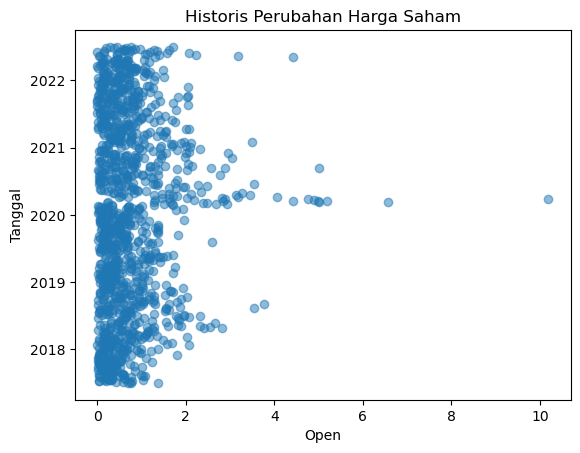

In [54]:
# Change %
plt.scatter(data=df,x='Change %', y='Date', alpha=0.5)
plt.title('Historis Perubahan Harga Saham')
plt.xlabel('Open')
plt.ylabel('Tanggal')
plt.xticks(rotation=0)
plt.show()

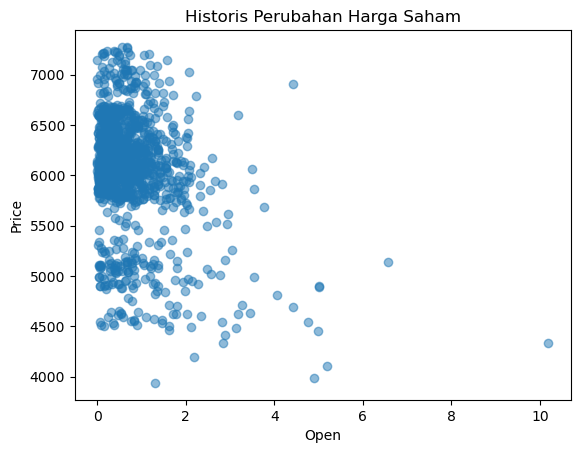

In [55]:
# Change % vs Price
plt.scatter(data=df,x='Change %', y='Price', alpha=0.5)
plt.title('Historis Perubahan Harga Saham')
plt.xlabel('Open')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

# Lanjutkan untuk semua Kolom dan beri keterangan untuk setiap grafik

In [56]:
# menentukan atribut dan label
X = df[[ 'Open', 'High', 'Low','Vol.','Change %','day','week','month','year']]
y = df['Price']  # Kolom 'Price' menjadi label yang ingin diprediksi

In [57]:
#membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# membangun model mesin learning
regression = LinearRegression()
#melakukan pembelajaran/training
regression.fit(X_train, y_train)

LinearRegression()

In [59]:
# melakukan pengujian
y_pred = regression.predict(X_test)
y_pred

array([6295.80809804, 6459.36361037, 7225.83439694, 6569.91549537,
       4957.60394721, 5711.40650834, 5801.98140764, 6248.9345951 ,
       6557.12713164, 6616.99090338, 5969.8445796 , 6654.05360979,
       6375.35919131, 5061.51362585, 6663.57136785, 5789.97387301,
       6106.30808547, 6485.49872455, 6259.79919537, 6133.711957  ,
       6037.22628447, 6241.91735448, 5909.43712153, 6451.74261668,
       6064.42017178, 6293.1187924 , 6280.42512904, 6470.16143385,
       6856.67906346, 5965.35076493, 6078.90569674, 5892.28888626,
       5988.41508722, 6182.48860374, 5911.86787192, 5888.06467087,
       5805.25372393, 5251.1682377 , 6057.66175481, 6397.51051635,
       7228.23939453, 6285.63724988, 6600.37496828, 5943.87553811,
       6207.79637158, 6268.61454284, 5987.29072979, 5003.10737359,
       6896.0648538 , 6120.84286186, 4659.90976074, 5989.96404754,
       4543.20270231, 6676.23283016, 6484.58974643, 5820.97940018,
       4941.72559825, 6891.02231395, 6636.55103078, 6088.93465

In [60]:
# mengecek nilai rata-rata error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 573.0055291188648


In [61]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 16.661837683644134


In [62]:
# mengecek nilai R2 score
r_squared = regression.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.9979232586898648


In [63]:
# mengukur tingkat akurasi
accuracy = regression.score(X_test, y_test) * 100
print('Accuracy:', accuracy, '%')

Accuracy: 99.79232586898648 %


# Menyimpan Model Mesin Learning Linear Regression

In [64]:
import joblib
# Menyimpan model dtree ke dalam file 'dtree_model.joblib'
joblib.dump(regression, 'Linier_regresi_model.joblib')


['Linier_regresi_model.joblib']

# Visualisasi Data hasil prediksi Vs Data Aktual

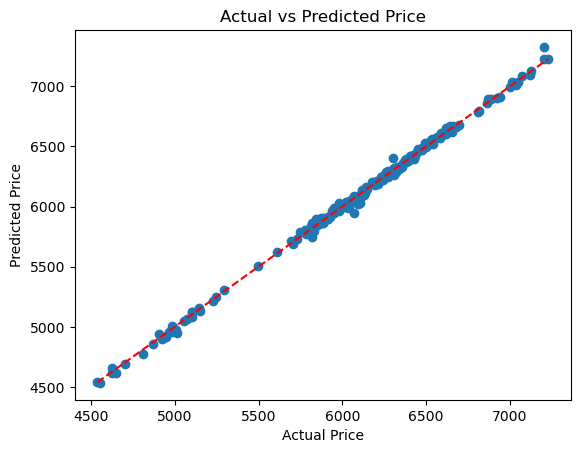

In [65]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

- model yang dibangun mampu memprediksi harga saham dengan akurat. Semakin dekat titik-titik dengan garis diagonal, semakin baik performa model dalam memprediksi harga saham. Jika terdapat sebaran yang signifikan atau pola yang tidak teratur pada grafik, hal ini menunjukkan adanya ketidakakuratan dalam model yang perlu diperbaiki atau ditingkatkan.

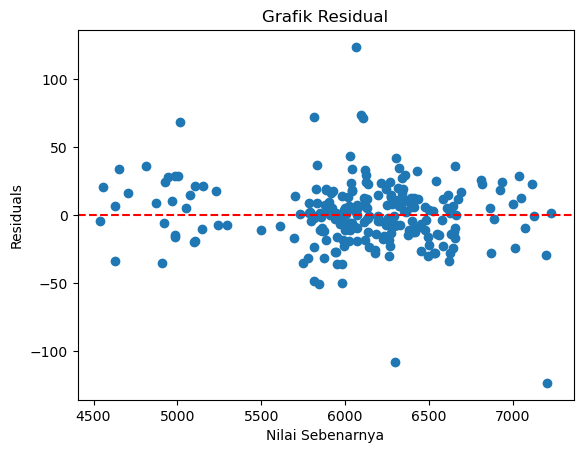

In [66]:
# Grafik residual
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.title('Grafik Residual')
plt.show()

- Garis horizontal pada nilai residual nol menunjukkan titik di mana prediksi benar-benar akurat, yaitu saat nilai prediksi sama dengan nilai aktual. Jika titik-titik pada grafik tersebar secara acak di sekitar garis horizontal, itu menunjukkan bahwa model memberikan prediksi yang akurat. Namun, jika terdapat pola atau kecenderungan tertentu pada titik-titik residual, itu menunjukkan adanya bias atau kesalahan sistematis dalam model.
- Dengan melihat grafik residual, kita dapat mengidentifikasi pola atau kecenderungan kesalahan dalam prediksi model. Jika terdapat pola tertentu, seperti residual yang cenderung meningkat atau menurun seiring dengan nilai prediksi, itu menunjukkan bahwa model mungkin memiliki bias atau kesalahan sistematis yang perlu diperbaiki. Jika titik-titik residual tersebar secara acak di sekitar nilai nol, itu menunjukkan bahwa model memberikan prediksi yang akurat secara keseluruhan.
- Grafik residual penting dalam mengevaluasi kualitas dan kecocokan model. Jika terdapat pola atau kecenderungan dalam residual, kita perlu melakukan penyesuaian atau perbaikan pada model untuk meningkatkan kualitas prediksinya.

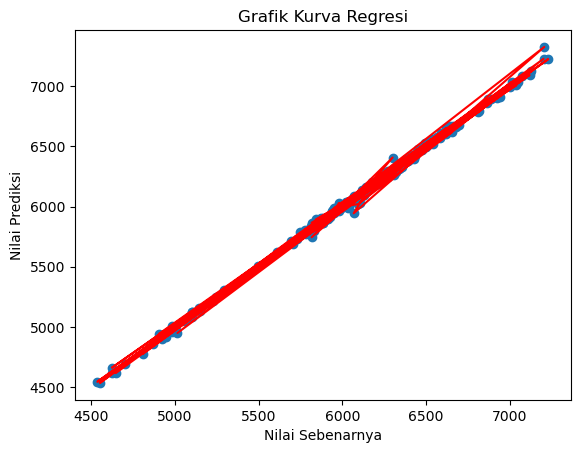

In [67]:
# Grafik kurva regresi
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_pred, 'r-')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Grafik Kurva Regresi')
plt.show()

- Kurva regresi dapat digunakan untuk memperkirakan nilai variabel dependen berdasarkan nilai variabel independen yang diberikan. Dengan melihat letak titik data terhadap kurva regresi, kita dapat memperoleh pemahaman tentang pola hubungan antara variabel input dan output. Misalnya, jika titik data berada di atas kurva regresi, itu menunjukkan nilai prediksi yang lebih tinggi dibandingkan dengan nilai aktual, dan sebaliknya.
- Kurva regresi memberikan gambaran visual tentang hubungan antara variabel input dan output dalam model regresi. Ini membantu kita memahami pola hubungan, mengevaluasi kualitas model, dan menggunakan kurva regresi untuk memperkirakan nilai variabel dependen berdasarkan variabel independen yang diberikan.

# Metode Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [69]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
y_pred = model.predict(X_test)

In [71]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1712.7828193415664


In [72]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9937923690864096


In [73]:
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 27.787860082304512


In [74]:
# Menghitung Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 41.385780400296504


- RMSE (Root Mean Squared Error) adalah metrik yang digunakan untuk mengukur sejauh manaperbedaan antara nilai aktual dan nilai prediksi pada skala yang sama. Semakin rendahnilai RMSE, semakin baik performa model dalam melakukan prediksi.

- Dalam kasus ini, nilai RMSE sebesar 41.385 menunjukkan bahwa rata-rata selisih antaranilai aktual dan nilai prediksi sekitar 41.385. Dalam konteks harga saham, ini berarti rata-rata kesalahan prediksi sekitar 41.385 unit mata uang (misalnya, rupiah) dalam setiap prediksi.

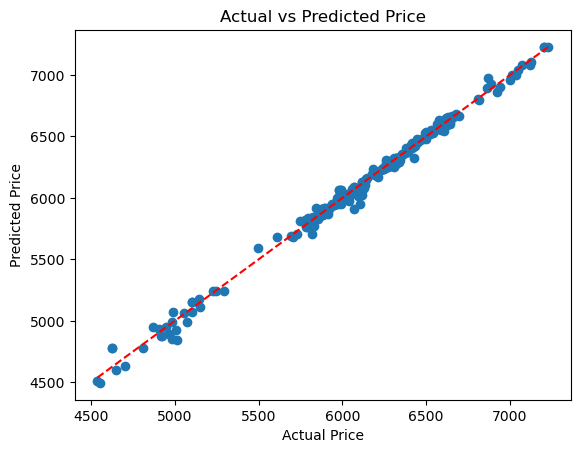

In [75]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# Menyimpan Model Mesin Learning Decission Tree

In [76]:
import joblib
# Menyimpan model dtree ke dalam file 'dtree_model.joblib'
joblib.dump(model, 'dtree_model.joblib')


['dtree_model.joblib']

# Pengujian Model
## Evaluasi & Validasi Hasil

In [77]:
# Load Data Uji
df_uji=pd.read_csv('./dataset/Dataset_uji.csv')
df_uji

,Date,Price,Open,High,Low,Vol.,Change %
0,06/27/2023,"6,661.88","6,664.67","6,679.63","6,652.90",14.23B,-0.04%
1,06/26/2023,"6,664.67","6,639.73","6,674.06","6,622.18",12.60B,0.38%
2,06/23/2023,"6,639.73","6,652.26","6,665.66","6,635.48",11.34B,-0.19%
3,06/22/2023,"6,652.26","6,702.77","6,717.98","6,652.26",16.85B,-0.75%
4,06/21/2023,"6,702.63","6,660.46","6,702.63","6,635.67",12.03B,0.63%
...,...,...,...,...,...,...,...
109,01/06/2023,"6,684.56","6,653.76","6,708.64","6,598.65",10.99B,0.46%
110,01/05/2023,"6,653.84","6,813.28","6,813.42","6,621.99",18.06B,-2.34%
111,01/04/2023,"6,813.24","6,888.80","6,900.60","6,813.24",14.25B,-1.10%
112,01/03/2023,"6,888.76","6,850.98","6,908.00","6,838.57",15.69B,0.55%


### Dataset baru yang diambil pada tanggal 2 Januari 2023 sampai 27 Juni 2023

In [78]:
# Mengubah tipe data kolom Date menjadi datetime
df_uji['Date'] = pd.to_datetime(df_uji['Date'])

# Mengubah tipe data kolom Price menjadi float
columns_harga = ['Price', 'Open', 'High', 'Low']
df_uji[columns_harga] = df_uji[columns_harga].replace(',', '', regex=True).astype(float)
#Ubah tipe data kolom Vol. menjadi tipe data numerik:
df_uji['Vol.'] = df_uji['Vol.'].str.replace(',', '')
df_uji['Vol.'] = df_uji['Vol.'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)
#Ubah tipe data kolom Change % menjadi tipe data numerik:
df_uji['Change %'] = df_uji['Change %'].str.replace('%', '')
df_uji['Change %'] = df_uji['Change %'].str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

In [79]:
df_uji=df_uji.dropna()

In [80]:
df_uji.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [81]:
#membagi waktu menjadi har,minggu,bulan,tahun
df_uji['day'] =df_uji['Date'].dt.day
df_uji['week'] =df_uji['Date'].dt.week
df_uji['month'] =df_uji['Date'].dt.month
df_uji['year'] =df_uji['Date'].dt.year
df_uji

,Date,Price,Open,High,Low,Vol.,Change %,day,week,month,year
0,2023-06-27,6661.88,6664.67,6679.63,6652.90,14.23,0.04,27,26,6,2023
1,2023-06-26,6664.67,6639.73,6674.06,6622.18,12.60,0.38,26,26,6,2023
2,2023-06-23,6639.73,6652.26,6665.66,6635.48,11.34,0.19,23,25,6,2023
3,2023-06-22,6652.26,6702.77,6717.98,6652.26,16.85,0.75,22,25,6,2023
4,2023-06-21,6702.63,6660.46,6702.63,6635.67,12.03,0.63,21,25,6,2023
...,...,...,...,...,...,...,...,...,...,...,...
109,2023-01-06,6684.56,6653.76,6708.64,6598.65,10.99,0.46,6,1,1,2023
110,2023-01-05,6653.84,6813.28,6813.42,6621.99,18.06,2.34,5,1,1,2023
111,2023-01-04,6813.24,6888.80,6900.60,6813.24,14.25,1.10,4,1,1,2023
112,2023-01-03,6888.76,6850.98,6908.00,6838.57,15.69,0.55,3,1,1,2023


In [82]:
# menentukan atribut dan label
X_uji = df_uji[[ 'Open', 'High', 'Low','Vol.','Change %','day','week','month','year']]
y_uji = df_uji['Price']  # Kolom 'Price' menjadi label yang ingin diprediksi

In [83]:
X_uji.shape

(114, 9)

In [84]:
y_uji.shape

(114,)

# Pengujian Model Regresi Linier

In [85]:
import joblib
# Memuat kembali model dtree dari file 'dtree_model.joblib'
modelLin = joblib.load('Linier_regresi_model.joblib')

In [86]:
y_pred1=modelLin.predict(X_uji)

In [87]:
y_pred1

array([6669.16581663, 6655.86919115, 6651.80527482, 6675.63846884,
       6677.62397255, 6645.15774614, 6680.64982805, 6691.25595943,
       6685.7460263 , 6705.96420915, 6721.92237941, 6698.83862151,
       6685.40097845, 6642.51677879, 6605.68756667, 6647.37085333,
       6633.45225682, 6597.65020549, 6662.15939053, 6653.39403495,
       6698.46041564, 6714.72045204, 6736.69781718, 6766.10555966,
       6731.51373977, 6708.01078756, 6691.37957859, 6685.29367686,
       6687.59910942, 6714.4043081 , 6739.46436988, 6809.8499848 ,
       6769.38638797, 6771.70795164, 6764.78244107, 6816.29119383,
       6796.98197881, 6839.8001734 , 6920.82266389, 6939.76409936,
       6896.81872069, 6830.11483493, 6786.0419151 , 6831.28899406,
       6788.6865047 , 6803.3100577 , 6779.89748793, 6753.35923973,
       6804.1564615 , 6850.15261553, 6821.23367994, 6842.48696828,
       6815.83021248, 6837.65345964, 6838.69347968, 6756.50710106,
       6725.08099136, 6764.19877035, 6676.58802783, 6605.82732

In [88]:
# mengecek nilai rata-rata error
mse = mean_squared_error(y_uji, y_pred1)
print('Mean Squared Error:', mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_uji, y_pred1)
print('Mean Absolute Error:', mae)
# Menghitung nilai R-squared
r_squared = r2_score(y_uji, y_pred1)
print('R-squared:', r_squared)
# Menghitung tingkat akurasi
accuracy = r_squared * 100
print('Accuracy:', accuracy, '%')

Mean Squared Error: 354.5743520732339
Mean Absolute Error: 15.003334519431144
R-squared: 0.9606403492913129
Accuracy: 96.0640349291313 %


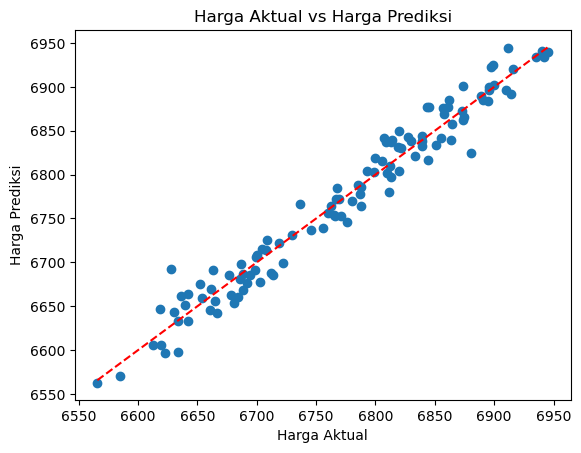

In [89]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_uji, y_pred1)
plt.plot([min(y_uji), max(y_uji)], [min(y_uji), max(y_uji)], 'r--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Harga Aktual vs Harga Prediksi')
plt.show()

# Pengujian Model Dtree

In [90]:
import joblib
# Memuat kembali model dtree dari file 'dtree_model.joblib'
modeldtree = joblib.load('dtree_model.joblib')

In [91]:
y_pred2=model.predict(X_uji)

In [92]:
y_pred2

array([6723.39, 6625.7 , 6658.36, 6707.65, 6662.3 , 6662.88, 6683.15,
       6683.15, 6683.15, 6695.37, 6723.39, 6695.37, 6683.15, 6602.21,
       6633.34, 6632.97, 6602.21, 6599.84, 6680.62, 6680.62, 6683.15,
       6695.37, 6691.34, 6691.34, 6695.37, 6662.87, 6683.15, 6677.88,
       6723.39, 6731.39, 6793.41, 6794.33, 6691.12, 6695.37, 6819.79,
       6789.52, 6794.33, 6814.18, 6918.19, 6918.19, 6924.01, 6789.52,
       6794.33, 6835.12, 6794.33, 6794.33, 6793.41, 6695.37, 6834.61,
       6814.18, 6789.52, 6814.18, 6816.2 , 6835.12, 6823.33, 6731.39,
       6731.39, 6734.49, 6665.31, 6665.31, 6611.16, 6633.34, 6656.  ,
       6689.29, 6793.41, 6695.37, 6794.33, 6691.12, 6793.41, 6816.2 ,
       6814.18, 6869.07, 6869.07, 6883.5 , 6892.82, 6883.5 , 6892.82,
       6817.82, 6918.19, 6976.38, 6918.19, 6918.19, 6918.19, 6918.19,
       6902.96, 6840.77, 6918.19, 6918.19, 6920.06, 6869.07, 6928.33,
       6869.07, 6869.07, 6892.82, 6892.82, 6976.38, 6892.82, 6892.82,
       6883.5 , 6892

In [93]:
mse = mean_squared_error(y_uji, y_pred2)
print("Mean Squared Error:", mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_uji, y_pred2)
print('Mean Absolute Error:', mae)
r2 = r2_score(y_uji, y_pred2)
print("R-squared:", r2)
r2 = r2 * 100
print('r2:', r2, '%')

Mean Squared Error: 1508.3105456140333
Mean Absolute Error: 30.06157894736841
R-squared: 0.8325694571858486
r2: 83.25694571858486 %


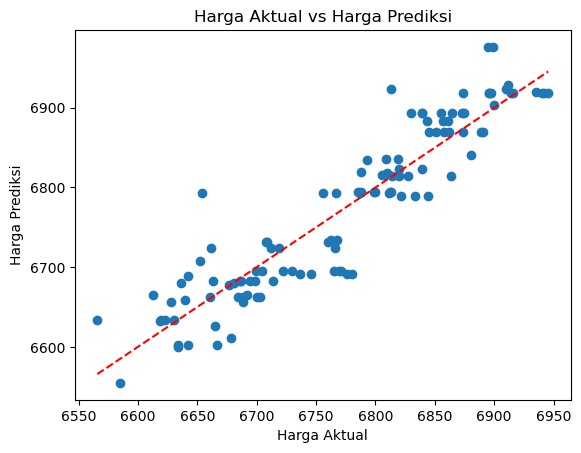

In [94]:
# Visualisasi hasil prediksi dengan data aktual
plt.scatter(y_uji, y_pred2)
plt.plot([min(y_uji), max(y_uji)], [min(y_uji), max(y_uji)], 'r--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Harga Aktual vs Harga Prediksi')
plt.show()

In [95]:
df.describe()

,Price,Open,High,Low,Vol.,Change %,day,week,month,year,Price Change
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1213.000000
mean,6055.395033,6058.512570,6089.489003,6020.633369,11.453213,0.732858,15.779242,26.651565,6.523064,2019.491763,-0.877972
std,563.943178,564.911891,559.535625,568.647559,6.431860,0.773887,8.696250,15.102006,3.466582,1.497846,59.498927
min,3937.630000,3937.630000,4123.560000,3911.720000,2.640000,0.000000,1.000000,1.000000,1.000000,2017.000000,-401.270000
25%,5867.085000,5863.542500,5895.357500,5835.880000,6.140000,0.240000,8.000000,13.000000,3.000000,2018.000000,-33.970000
50%,6106.935000,6107.520000,6134.135000,6066.815000,9.690000,0.530000,16.000000,27.000000,7.000000,2019.000000,-2.080000
75%,6384.442500,6390.697500,6413.157500,6359.727500,15.937500,0.957500,23.000000,40.000000,10.000000,2021.000000,25.510000
max,7276.190000,7283.420000,7355.300000,7245.730000,34.480000,10.190000,31.000000,53.000000,12.000000,2022.000000,407.360000
